## Regression
![Regression](/images/regression.png "Regression variables")

### Simple Regression
1. Semple linear regression
1. Simple Non-linear regression
    - Ex: Predict co2emission x engineSize of all cars

### Multiple Regression
1. Multiple linear regression
1. Multiple Non-linear regression;
    - Ex: Predict co2emission x engineSize x cylinders of all cars

### Applications of Regression
1. Sales forecasting
1. Satisfaction analysis
1. Price estimation
1. Employment income


In [86]:
import pandas as pd

df = pd.read_csv("./src/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Engine Size X Emission

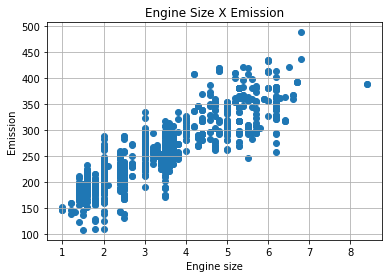

In [87]:
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.title("Engine Size X Emission")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.grid()
plt.show()


### Linear Regression from scretch
<br>
Y = (theta0+theta1)x1
sum 1 to s
<br>
thata1 = sum((xi-x)(y1-y))/(sum((xi-x)))²

In [88]:
import numpy as np
x = df.ENGINESIZE
y = df.CO2EMISSIONS

x_sum = ((np.array(x)/len(x)).sum())
y_sum = ((np.array(y)/len(y)).sum())

upper_division = ((x - x_sum)*(y - y_sum)).sum()
down_division = ((x - x_sum)*(x - x_sum)).sum()
theta1 = upper_division/down_division
theta0 = y_sum - (theta1 * x_sum)

print ("Coefficients: ", theta1)
print ("Intercept: ", theta0)


Coefficients:  39.12519978671173
Intercept:  125.30409949535681


### Linear Regression with SkLearn

In [89]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(np.array(df[["ENGINESIZE"]]), np.array(df[["CO2EMISSIONS"]]))
print ("Coefficients: ", regr.coef_)
print ("Intercept: ",regr.intercept_)

Coefficients:  [[39.12519979]]
Intercept:  [125.3040995]


### Y value to ENGINESIZE = 2.4

In [90]:
predict_value = theta0+(theta1*2.4)
predict_value.round(2)

219.2

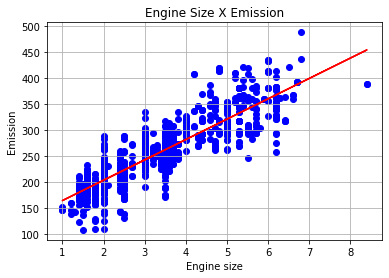

In [91]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.plot(df.ENGINESIZE, regr.coef_[0][0]*df.ENGINESIZE + regr.intercept_[0], '-r')
plt.title("Engine Size X Emission")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.grid()
plt.show()

### Creating a train and test dataset

In [92]:
new_df = df[["CYLINDERS","ENGINESIZE","CO2EMISSIONS","FUELCONSUMPTION_COMB"]]
mask = np.random.rand(len(df)) < .8
train = new_df[mask]
test = new_df[~mask]

In [93]:
regression = linear_model.LinearRegression()
regression.fit(train[["ENGINESIZE"]], train[["CO2EMISSIONS"]])

coeficient = regression.coef_[0][0]
intercept = regression.intercept_[0]
print(f"Coeficient: {coeficient}, Intercept: {intercept}")

Coeficient: 38.79987172846098, Intercept: 126.80924913815821


### Plotting

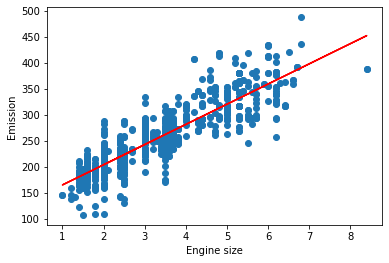

In [94]:
# Equation coeficient*x + intercept
plt.scatter(train[["ENGINESIZE"]], train[["CO2EMISSIONS"]])
plt.plot(train[["ENGINESIZE"]], coeficient*train[["ENGINESIZE"]]+intercept, color="red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Evaluate Error

In [104]:
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.78
Residual sum of squares (MSE): 993.28
R2-score: 0.75
